In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statistics as stat
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Q7

In [4]:
Q7=pd.read_csv('Q7.csv')
Q7

,Unnamed: 0,Points,Score,Weigh
0,Mazda RX4,3.90,2.620,16.46
1,Mazda RX4 Wag,3.90,2.875,17.02
2,Datsun 710,3.85,2.320,18.61
3,Hornet 4 Drive,3.08,3.215,19.44
4,Hornet Sportabout,3.15,3.440,17.02
5,Valiant,2.76,3.460,20.22
6,Duster 360,3.21,3.570,15.84
7,Merc 240D,3.69,3.190,20.00
8,Merc 230,3.92,3.150,22.90
9,Merc 280,3.92,3.440,18.30


In [7]:
Q7.describe().round(2)

,Points,Score,Weigh
count,32.00,32.00,32.00
mean,3.60,3.22,17.85
std,0.53,0.98,1.79
min,2.76,1.51,14.50
25%,3.08,2.58,16.89
50%,3.70,3.32,17.71
75%,3.92,3.61,18.90
max,4.93,5.42,22.90


In [8]:
Q7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  32 non-null     object 
 1   Points      32 non-null     float64
 2   Score       32 non-null     float64
 3   Weigh       32 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.1+ KB


In [9]:
Q7.var().round(2)

Points    0.29
Score     0.96
Weigh     3.19
dtype: float64

In [10]:
stat.median(Q7["Points"])

3.6950000000000003

In [11]:
Q7.median().round(2)

Points     3.70
Score      3.32
Weigh     17.71
dtype: float64

In [12]:
Q7.mode().round(2).head(2)

,Unnamed: 0,Points,Score,Weigh
0,AMC Javelin,3.07,3.44,17.02
1,Cadillac Fleetwood,3.92,NaN,18.90


In [13]:
stat.mode(Q7['Points'])

3.92

In [14]:
stat.mode(Q7['Points'])

3.92

In [15]:
stat.mode(Q7['Weigh'])

17.02

In [16]:
Q7.var()

Points    0.285881
Score     0.957379
Weigh     3.193166
dtype: float64

In [17]:
Q7.rename(columns={'Unnamed: 0':'Cars'}, inplace = True)
Q7.head()

,Cars,Points,Score,Weigh
0,Mazda RX4,3.90,2.620,16.46
1,Mazda RX4 Wag,3.90,2.875,17.02
2,Datsun 710,3.85,2.320,18.61
3,Hornet 4 Drive,3.08,3.215,19.44
4,Hornet Sportabout,3.15,3.440,17.02


In [18]:
Q7.set_index(('Cars'), inplace = True)
Q7.head()

,Points,Score,Weigh
Cars,,,
Mazda RX4,3.90,2.620,16.46
Mazda RX4 Wag,3.90,2.875,17.02
Datsun 710,3.85,2.320,18.61
Hornet 4 Drive,3.08,3.215,19.44
Hornet Sportabout,3.15,3.440,17.02


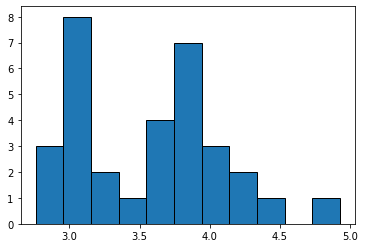

In [19]:
plt.hist(Q7["Points"], bins = 11, edgecolor= 'black')
plt.show()

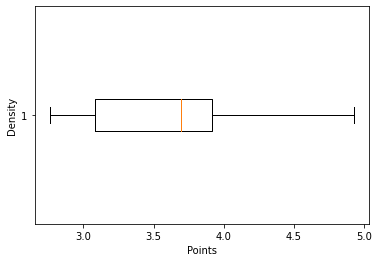

In [25]:
plt.boxplot(x = 'Points', data =Q7, vert=False)
plt.xlabel('Points')
plt.ylabel('Density')
plt.savefig("PointsInferences.png")
plt.show()

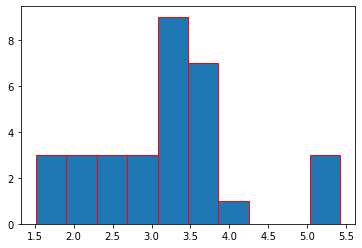

In [26]:
plt.hist(Q7["Score"], edgecolor = 'r')
plt.show()

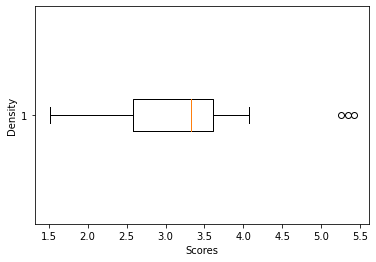

In [27]:
plt.boxplot(x = 'Score', data= Q7, vert=False)
plt.xlabel('Scores')
plt.ylabel('Density')
plt.savefig("ScoresInferences.png")
plt.show()

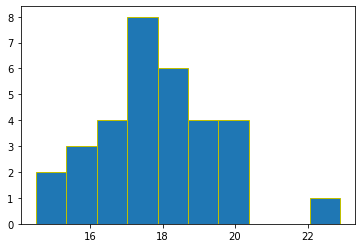

In [28]:
plt.hist(Q7["Weigh"], bins=10, edgecolor = 'y')
plt.show()

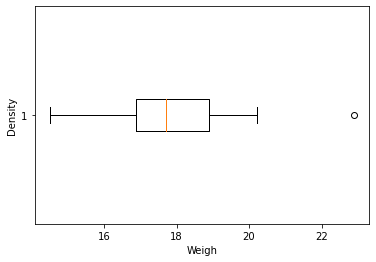

In [29]:
plt.boxplot(x= "Weigh", data = Q7, vert=False)
plt.xlabel('Weigh')
plt.ylabel('Density')
plt.savefig("WeighInferences.png")
plt.show()

# Q9(a)

In [31]:
Q9_a= pd.read_csv('Q9_a.csv')
Q9_a

,Index,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16
5,6,9,10
6,7,10,18
7,8,10,26
8,9,10,34
9,10,11,17


In [33]:
Q9_a.kurt()

Index   -1.200000
speed   -0.508994
dist     0.405053
dtype: float64

In [34]:
Q9_a.skew()

Index    0.000000
speed   -0.117510
dist     0.806895
dtype: float64

In [35]:
print('For Cars Speed', "Skewness value=", np.round(Q9_a.speed.skew(),2), 'and' , 'Kurtosis value=', np.round(Q9_a.speed.kurt(),2))

For Cars Speed Skewness value= -0.12 and Kurtosis value= -0.51


In [36]:
print('Skewness value =', np.round(Q9_a.dist.skew(),2),'and', 'Kurtosis value =', np.round(Q9_a.dist.kurt(),2), 'for Cars Distance')

Skewness value = 0.81 and Kurtosis value = 0.41 for Cars Distance


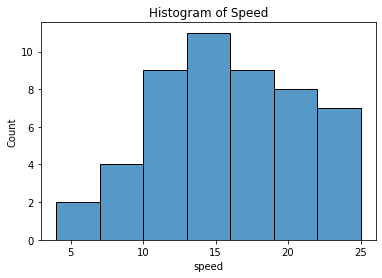

In [37]:
sns.histplot(data=Q9_a, x='speed')
plt.title('Histogram of Speed')
plt.show()

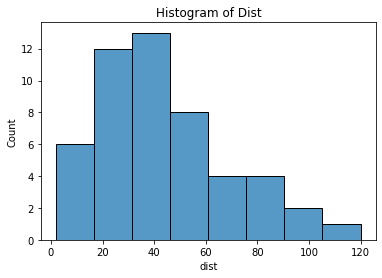

In [38]:
sns.histplot(data=Q9_a, x='dist')
plt.title('Histogram of Dist')
plt.show()

# Q9(b)

In [39]:
Q9_b=pd.read_csv('Q9_b.csv')
Q9_b

,Unnamed: 0,SP,WT
0,1,104.185353,28.762059
1,2,105.461264,30.466833
2,3,105.461264,30.193597
3,4,113.461264,30.632114
4,5,104.461264,29.889149
...,...,...,...
76,77,169.598513,16.132947
77,78,150.576579,37.923113
78,79,151.598513,15.769625
79,80,167.944460,39.423099


In [40]:
Q9_b.rename(columns = {'Unnamed: 0':'Index'}, inplace = True)
Q9_b.head()

,Index,SP,WT
0,1,104.185353,28.762059
1,2,105.461264,30.466833
2,3,105.461264,30.193597
3,4,113.461264,30.632114
4,5,104.461264,29.889149


In [41]:
Q9_b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Index   81 non-null     int64  
 1   SP      81 non-null     float64
 2   WT      81 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 2.0 KB


In [42]:
Q9_b.skew()

Index    0.000000
SP       1.611450
WT      -0.614753
dtype: float64

In [43]:
Q9_b.kurtosis()

Index   -1.200000
SP       2.977329
WT       0.950291
dtype: float64

In [44]:
print('For SP Skewness =', np.round(Q9_b.SP.skew(),2), 'kurtosis =', np.round(Q9_b.SP.kurt(),2))

For SP Skewness = 1.61 kurtosis = 2.98


In [45]:
print('For WT Skewness =', np.round(Q9_b.WT.skew(),2), 'Kurtosis =', np.round(Q9_b.WT.kurt(),2))

For WT Skewness = -0.61 Kurtosis = 0.95


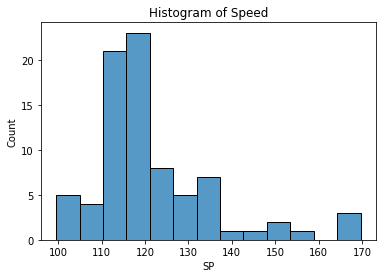

In [46]:
sns.histplot(data=Q9_b, x='SP')
plt.title('Histogram of Speed')
plt.show()

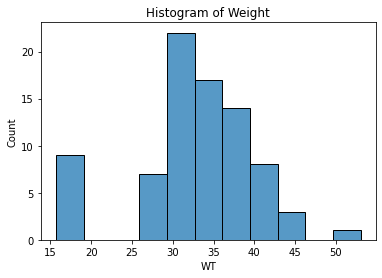

In [47]:
sns.histplot(data=Q9_b, x='WT')
plt.title('Histogram of Weight')
plt.show()

# Q11

In [48]:
# Avg. weight of Adult in Mexico with 94% CI
stats.norm.interval(0.94,200,30/(2000**0.5))

(198.738325292158, 201.261674707842)

In [49]:
# Avg. weight of Adult in Mexico with 98% CI
stats.norm.interval(0.98,200,30/(2000**0.5))

(198.43943840429978, 201.56056159570022)

In [50]:
# Avg. weight of Adult in Mexico with 96% CI
stats.norm.interval(0.96,200,30/(2000**0.5))

(198.62230334813333, 201.37769665186667)

# Q12

In [51]:
marks = [34,36,36,38,38,39,39,40,40,41,41,41,41,42,42,45,49,56]
marks

[34, 36, 36, 38, 38, 39, 39, 40, 40, 41, 41, 41, 41, 42, 42, 45, 49, 56]

In [52]:

stat.mean(marks)

41

In [53]:
stat.median(marks)

40.5

In [54]:
stat.mode(marks)

41

In [55]:
stat.stdev(marks)

5.05266382858645

In [56]:
stat.variance(marks)

25.529411764705884

In [57]:
marks_df = pd.DataFrame({'students':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                    'marks':(marks)})
marks_df

,students,marks
0,1,34
1,2,36
2,3,36
3,4,38
4,5,38
5,6,39
6,7,39
7,8,40
8,9,40
9,10,41


In [58]:
marks_df.describe()

,students,marks
count,18.000000,18.000000
mean,9.500000,41.000000
std,5.338539,5.052664
min,1.000000,34.000000
25%,5.250000,38.250000
50%,9.500000,40.500000
75%,13.750000,41.750000
max,18.000000,56.000000


In [59]:
marks_df.set_index('students')

,marks
students,
1,34
2,36
3,36
4,38
5,38
6,39
7,39
8,40
9,40


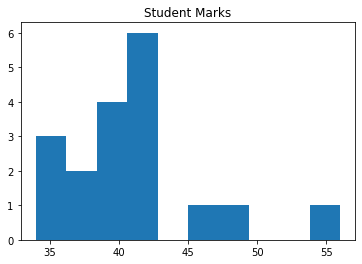

In [61]:
plt.hist(x=marks)
plt.title("Student Marks")
plt.show()

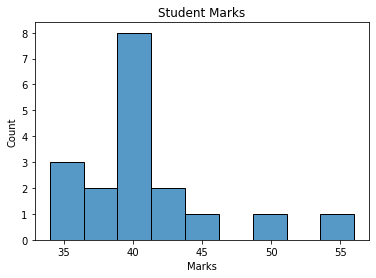

In [62]:
sns.histplot(x=marks)
plt.xlabel('Marks')
plt.title("Student Marks")
plt.show()

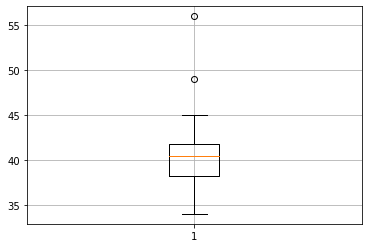

In [63]:
plt.boxplot(marks)
plt.grid()
plt.show()

# Q20

In [64]:
cars=pd.read_csv('Cars.csv')
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


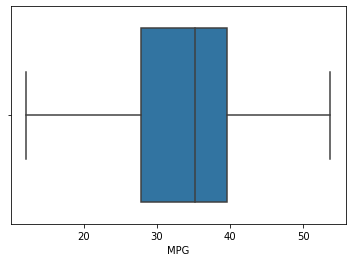

In [65]:
sns.boxplot(x='MPG',data=cars)
plt.show()

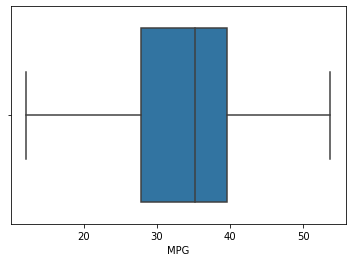

In [66]:
sns.boxplot(cars.MPG)
plt.show()

In [67]:
cars.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


In [68]:
# P(MPG>38)
1-stats.norm.cdf(38,cars.MPG.mean(),cars.MPG.std())

0.3475939251582705

In [69]:
# P(MPG>38)
1-stats.norm.cdf(38,cars.MPG.mean(),cars.MPG.std())

0.3475939251582705

In [70]:
# P(MPG<40)
stats.norm.cdf(40,cars.MPG.mean(),cars.MPG.std())

0.7293498762151616

In [71]:
stats.norm.cdf(x = 40,loc = 34.42, scale = 9.13)

0.7294571279557076

In [72]:
# P (20<MPG<50)
stats.norm.cdf(0.50,cars.MPG.mean(),cars.MPG.std())-stats.norm.cdf(0.20,cars.MPG.mean(),cars.MPG.std()) 


1.2430968797327613e-05

In [73]:
stats.norm.cdf(x = 50,loc = 34.42, scale = 9.13) - stats.norm.cdf(x = 20,loc = 34.42, scale = 9.13)

0.8989177824549222

# Q21)a

In [74]:
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


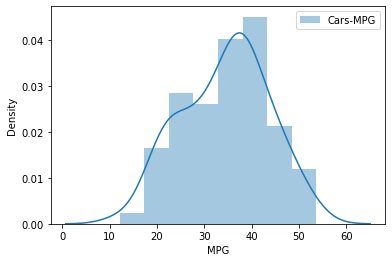

In [75]:
sns.distplot(cars.MPG,label='Cars-MPG')
plt.xlabel('MPG')
plt.ylabel('Density')
plt.legend()
plt.show()

In [76]:
cars.MPG.mean()

34.422075728024666

In [77]:
cars.MPG.median()

35.15272697

In [78]:
cars.skew()

HP     1.716216
MPG   -0.177947
VOL   -0.590197
SP     1.611450
WT    -0.614753
dtype: float64

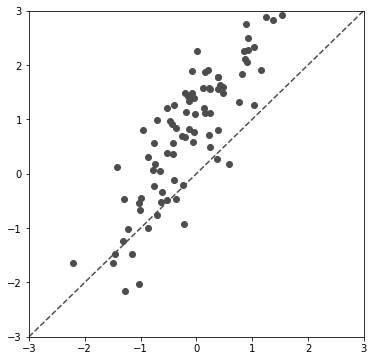

In [79]:
mean, cov = [0, 0], [(1, .6), (.6, 1)]
x, y = np.random.multivariate_normal(mean, cov, 100).T
y += x + 1

f, ax = plt.subplots(figsize=(6, 6))

ax.scatter(x, y, c=".3")
ax.set(xlim=(-3, 3), ylim=(-3, 3))

# Plot your initial diagonal line based on the starting
# xlims and ylims.
diag_line, = ax.plot(ax.get_xlim(), ax.get_ylim(), ls="--", c=".3")

def on_change(axes):
    # When this function is called it checks the current
    # values of xlim and ylim and modifies diag_line
    # accordingly.
    x_lims = ax.get_xlim()
    y_lims = ax.get_ylim()
    diag_line.set_data(x_lims, y_lims)

# Connect two callbacks to your axis instance.
# These will call the function "on_change" whenever
# xlim or ylim is changed.
ax.callbacks.connect('xlim_changed', on_change)
ax.callbacks.connect('ylim_changed', on_change)

plt.show()

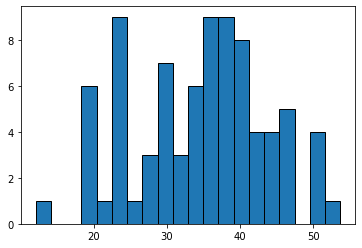

In [80]:
plt.hist(cars["MPG"], bins = 20, edgecolor=  'black')
plt.show()

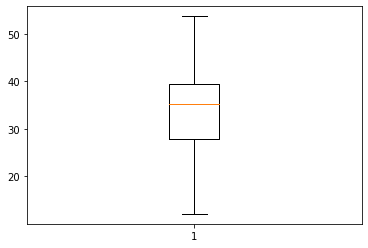

In [81]:
plt.boxplot(x= 'MPG', data =cars)
plt.show()

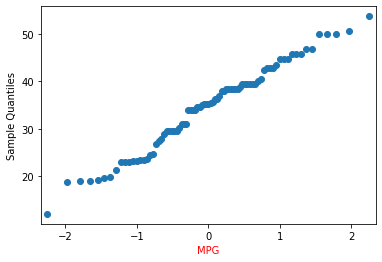

In [82]:
sm.qqplot(cars['MPG'])
plt.xlabel('MPG', color ='red')
plt.savefig('MPG of cars.png')
plt.show()

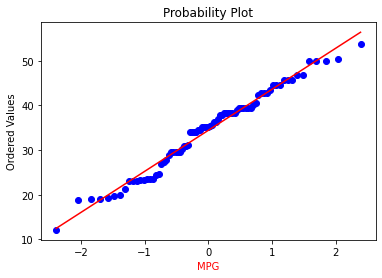

In [83]:
stats.probplot(cars['MPG'], dist="norm", plot=plt)
plt.xlabel('MPG', color ='red')
plt.savefig('MPG of cars.png')
plt.show()

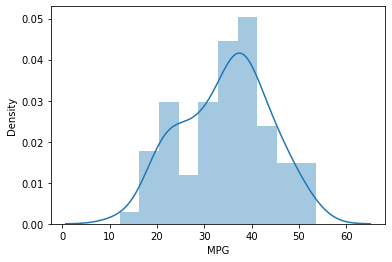

In [84]:
sns.distplot(cars['MPG'],kde=True, bins =10)
plt.show()

# Q21)b

In [86]:
df=pd.read_csv('wc-at.csv')
df.head()

,Waist,AT
0,74.75,25.72
1,72.60,25.89
2,81.80,42.60
3,83.95,42.80
4,74.65,29.84


In [87]:
df.describe()

,Waist,AT
count,109.000000,109.000000
mean,91.901835,101.894037
std,13.559116,57.294763
min,63.500000,11.440000
25%,80.000000,50.880000
50%,90.800000,96.540000
75%,104.000000,137.000000
max,121.000000,253.000000


In [88]:
df.mean()

Waist     91.901835
AT       101.894037
dtype: float64

In [89]:
df.median()

Waist    90.80
AT       96.54
dtype: float64

In [90]:
df.mode()
# waist is multimodal, AT is bimodal data

,Waist,AT
0,94.5,121.0
1,106.0,123.0
2,108.5,NaN


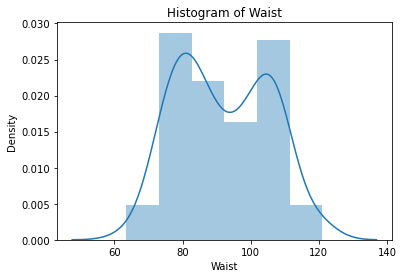

In [91]:
sns.distplot(df['Waist'])
plt.title('Histogram of Waist')
plt.show()

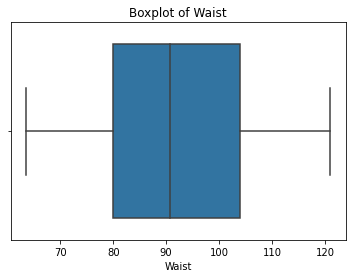

In [92]:
sns.boxplot(df['Waist'])
plt.title('Boxplot of Waist')
plt.show()
# mean> median, both the whisker are of same lenght, median is slightly shifted towards left. Data is fairly symetric


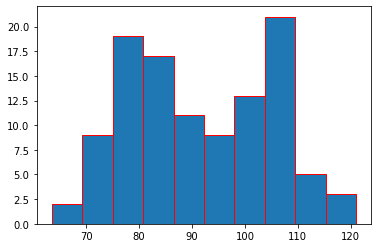

In [93]:
plt.hist(df['Waist'], edgecolor= 'red')
plt.show()

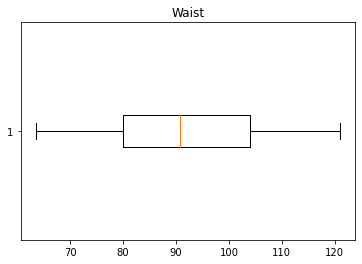

In [94]:
plt.boxplot(x = 'Waist', data= df, vert=False)
plt.title("Waist")
plt.savefig('Waist.png')
plt.show()

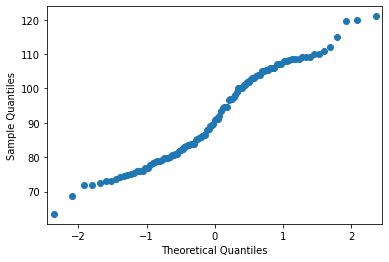

In [95]:
sm.qqplot(df['Waist'])
plt.show()

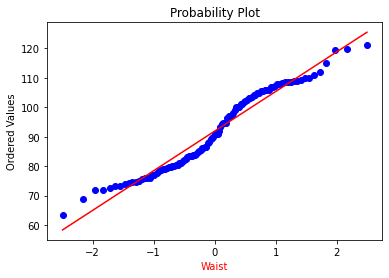

In [96]:
stats.probplot(df['Waist'], dist = 'norm', plot = plt)
plt.xlabel('Waist', color= 'red')
plt.savefig('Waist.png')
plt.show()

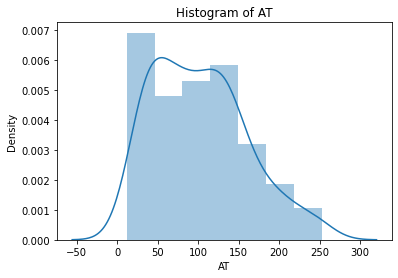

In [97]:
sns.distplot(df['AT'])
plt.title('Histogram of AT')
plt.show()

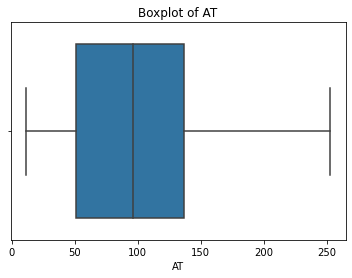

In [98]:
sns.boxplot(df['AT'])
plt.title('Boxplot of AT')
plt.show()
# mean> median, right whisker is larger than left whisker, data is positively skewed.

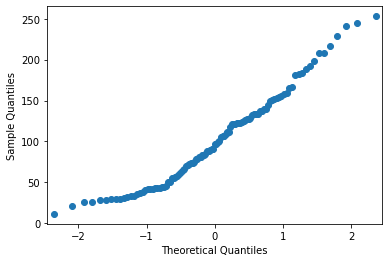

In [99]:
sm.qqplot(df['AT'])
plt.show()

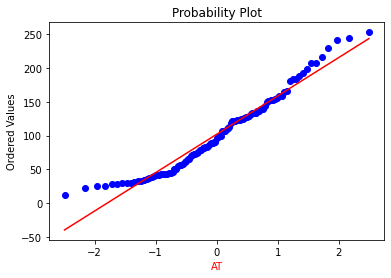

In [100]:
stats.probplot(df['AT'], dist = 'norm', plot = plt)
plt.xlabel('AT', color= 'red')
plt.savefig('AT.png')
plt.show()

# Q22

In [101]:
# Z-score of 60% confidence interval
stats.norm.ppf(0.8)

0.8416212335729143

In [102]:
# Z-score of 90% confidence interval 
stats.norm.ppf(0.95)

1.6448536269514722

In [103]:
# Z-score of 94% confidence interval
stats.norm.ppf(0.97)

1.8807936081512509

# Q24

Assume Null Hypothesis is: Ho = Avg life of Bulb >= 260 days

Alternate Hypothesis is: Ha = Avg life of Bulb < 260 days

In [104]:
# find t-scores at x=260; t=(s_mean-P_mean)/(s_SD/sqrt(n))
t=(260-270)/(90/18**0.5)
t

-0.4714045207910317

In [105]:
t_value = (260-270)/(90/np.sqrt(18)) #  Method 2
t_value

-0.4714045207910317

Find P(X>=260) for null hypothesis

In [106]:
# p_value=1-stats.t.cdf(abs(t_scores),df=n-1)... Using cdf function
p_value=1-stats.t.cdf(abs(-0.4714),df=17)
p_value

0.32167411684460556